# Problem Statement

[Food-101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/) is a challenging vision problem, but everyone can relate to it.  Recent SoTA is ~80% top-1, 90% top-5.  These approaches rely on lots of TTA, large networks and  even novel architectures.

Train a decent model >85% accuracy for top-1 for the test set, using a ResNet50 or smaller network with a reasonable set of augmentations. 

![sample image from dataset](/images/food-101.jpg "Food-101 sample images")



---

**Previous SoTA Results:**

Following is a comparison of the previous SoTA classification results for the Food-101 dataset.

| Model                    |  Augmentations           |  Epochs  |  Top-1 Accuracy  % |  Top-5 Accuracy %  |
| ------------------------|----------------------------------| --------------|------------------------------|------------------------------ |
| InceptionV3      | Flip, Rotation, Color, Zoom | 32   |                 88.28           |            96.88                 |
|WISeR                    | Flip, Rotation, Color, Zoom |  ~ 32   |               90.27    |           98.71                   |
| ResNet+fastai   | Optional Transformations |  16   |                 90.52           |            98.34                 |


---

**References:**

[1] **Inception V3 Approach** Hassannejad, Hamid, et al. [Food image recognition using very deep convolutional networks](https://dl.acm.org/citation.cfm?id=2986042). Proceedings of the 2nd International Workshop on Multimedia Assisted Dietary Management . ACM, 2016.

[2 ] **WISeR Approach** Martinel, Niki, Gian Luca Foresti, and Christian Micheloni. [Wide-slice residual networks for food recognition](https://arxiv.org/pdf/1612.06543.pdf) . Applications of Computer Vision (WACV), 2018 IEEE Winter Conference on . IEEE, 2018.

[3] **ResNet + fastai Approach** [platform.ai](https://platform.ai/blog/page/3/new-food-101-sota-with-fastai-and-platform-ais-fast-augmentation-search/) 

---

## Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/fellowship.ai-challenges/blob/master/food-101/notebooks/keras_food_101.ipynb)




## Get data

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [0]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

In [0]:
#uncomment this once to upload kaggle.json

from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving kaggle.json to kaggle.json


In [0]:
#uncomment and run this once when you upload kaggle.json

! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/


In [0]:
from pathlib import Path

path = Path('data/')

In [0]:
!kaggle datasets download -d dansbecker/food-101 -p {path}

In [0]:
! unzip {path}/food-101.zip -d {path}

In [0]:
! unzip -q {path}/food-101.zip -d {path}

In [0]:
# ! wget "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz" -P {"data/"}
# ! tar -xf "data/food-101.tar.gz" -C "data/"

# Food-101 

We will tackle this problem using two frameworks, (i) [Keras](http://keras.io/) (ii) [Fastai](https://docs.fast.ai/).
 
 We will use keras(*awesome library*) in this notebook.
 
 ---
 
 ## Introduction
 
 Our objective is to classify 101,000 food images in 101 categories.
 
This is very so ImageNet like where we had 1.2  million images to classify into 1000 categories. There we saw explosion of different architectures starting from AlexNet, ZFNet, VGG, GoogLeNet, Inception v3, ResNet, SqueezeNet, and many other Nets to tackle this problem *better than humans*.
 

Now it's time to stand on shoulder of these Nets and use it to solve our classification problem into 101 food categories.

We have already seen a great length why **CNNs** are great at these jobs and we looked at many other things in [this blog](https://dudeperf3ct.github.io/cnn/mnist/2018/10/17/Force-of-Convolutional-Neural-Networks/).

---

## Our Approach

We will use xception as base architecture.


- We will use xception architecture which requires 299 x 299 image size as input using `ImageDataGenerator` from keras to create training and validation data sets
- Next, the architecture is frozen and trained for 15 epochs
- Finetune the model and train for another 15 epochs

*Simple Enough?*

What result do we obtain after going through all this? Let's have a look

All results obtained are using Google Colab(*thanks Google!*).


|  Phase                       |   Time Taken (hrs)          |  Epochs  |  Top-1 Accuracy  % |  Top-5 Accuracy %  |
| ------------------------     |----------------------------------| --------------|------------------------------|------------------------------ |
| Freeze and Train on 299 size images  |  11 | 15   |                 38           |            66                |
|  Unfreeze and Train on 299 size images | 9  |  15   |               55    |           79                  |


---

**Conclusion**

*Phew!* 

**A lot of patience** - 22 hrs (*and dealing with colab is not easy, poor connections will lead to always disconnecting and 12 hrs timeout*)

**Not so Cool Classifier** - Top-1 Accuracy = 55% and Top-5 Accuracy = 79%  (Compared to Fastai results)

---

**Improvements**

Results can further be improved

- Train longer (*as always, I need more power*)
- Ways to reduce overfitting .. hmm regularization, different architecture Inception or ResNet ... maybe.

---

*Don't forget to check out the blog in case you need a refresher on CNN, Transfer Learning and Visualizing CNN.*

Link: 

[1] [CNNs](https://dudeperf3ct.github.io/cnn/mnist/2018/10/17/Force-of-Convolutional-Neural-Networks/).

[2] [Transfer Learning](https://dudeperf3ct.github.io/transfer/learning/catsvsdogs/2018/11/20/Power-of-Transfer-Learning/).

[3] [Visualizing CNN](https://dudeperf3ct.github.io/visualize/cnn/catsvsdogs/2018/12/02/Power-of-Visualizing-Convolution-Neural-Networks/).


## Keras

In [0]:
import keras
from keras_contrib.callbacks.cyclical_learning_rate import CyclicLR
from keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, AveragePooling2D
from keras.models import Model, load_model, Sequential
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import numpy as np
import os
import random
from PIL import Image
from pathlib import Path
import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
path = Path('data/food-101/images')

In [0]:
os.listdir(path)

['spaghetti_carbonara',
 'onion_rings',
 'croque_madame',
 'foie_gras',
 'gyoza',
 'pork_chop',
 'dumplings',
 'steak',
 'donuts',
 'samosa',
 'tiramisu',
 'french_fries',
 'lasagna',
 'gnocchi',
 'club_sandwich',
 'baby_back_ribs',
 'huevos_rancheros',
 'breakfast_burrito',
 'guacamole',
 'macarons',
 'frozen_yogurt',
 'lobster_roll_sandwich',
 'hot_and_sour_soup',
 'beef_tartare',
 'waffles',
 'pancakes',
 'clam_chowder',
 'pad_thai',
 'carrot_cake',
 'miso_soup',
 'poutine',
 'paella',
 'ramen',
 'caprese_salad',
 'sushi',
 'falafel',
 'panna_cotta',
 'chicken_wings',
 'cheesecake',
 'spaghetti_bolognese',
 'risotto',
 'cheese_plate',
 'greek_salad',
 'escargots',
 'ice_cream',
 'pizza',
 'pulled_pork_sandwich',
 '.DS_Store',
 'caesar_salad',
 'macaroni_and_cheese',
 'french_onion_soup',
 'hamburger',
 'tuna_tartare',
 'sashimi',
 'tacos',
 'mussels',
 'seaweed_salad',
 'shrimp_and_grits',
 'eggs_benedict',
 'oysters',
 'grilled_cheese_sandwich',
 'prime_rib',
 'takoyaki',
 'fried_r

## Exploration of data

In [0]:
# number of classes
files = os.listdir(path)

files.remove('.DS_Store')

num_classes = len(files)
print ('Number of classes:', num_classes)

dist = dict()
# class distribution
for f in files:
    dist[f] = len(os.listdir(path/f))

print ('Class distribution:')
print (dist)

Number of classes: 101
Class distribution:
{'macaroni_and_cheese': 1000, 'clam_chowder': 1000, 'frozen_yogurt': 1000, 'pad_thai': 1000, 'spaghetti_bolognese': 1000, 'beef_tartare': 1000, 'gnocchi': 1000, 'paella': 1000, 'beet_salad': 1000, 'ice_cream': 1000, 'panna_cotta': 1000, 'breakfast_burrito': 1000, 'baklava': 1000, 'lasagna': 1000, 'steak': 1000, 'samosa': 1000, 'eggs_benedict': 1000, 'club_sandwich': 1000, 'dumplings': 1000, 'strawberry_shortcake': 1000, 'omelette': 1000, 'chocolate_cake': 1000, 'deviled_eggs': 1000, 'grilled_salmon': 1000, 'apple_pie': 1000, 'chicken_wings': 1000, 'grilled_cheese_sandwich': 1000, 'macarons': 1000, 'ceviche': 1000, 'bibimbap': 1000, 'tacos': 1000, 'seaweed_salad': 1000, 'red_velvet_cake': 1000, 'garlic_bread': 1000, 'cheese_plate': 1000, 'beef_carpaccio': 1000, 'lobster_roll_sandwich': 1000, 'nachos': 1000, 'hamburger': 1000, 'poutine': 1000, 'croque_madame': 1000, 'prime_rib': 1000, 'scallops': 1000, 'onion_rings': 1000, 'cheesecake': 1000, 'f

In [0]:
keys = random.sample(list(dist.keys()), 10)
values = [dist[k] for k in keys]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

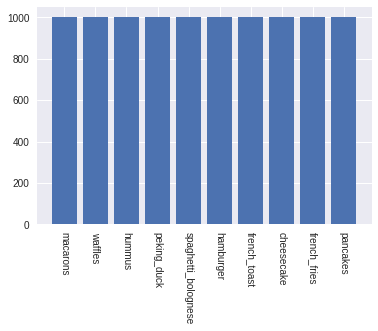

In [0]:
plt.bar(keys, values)
plt.xticks(rotation=270)

## Visualize data

In [0]:
def show_img(rows, cols, figsize=None):
      
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    for i in range(rows):
        for j in range(cols):
            random_folder = random.choice(files)
            random_file = random.choice(os.listdir(path/random_folder))
            im = Image.open(path/random_folder/random_file)
            ax[i, j].imshow(im)
            ax[i, j].set_xlabel(str(random_folder) + " " + str(im.size))
            ax[i, j].set_yticklabels([])
            ax[i, j].set_xticklabels([])
            ax[i, j].grid(False)

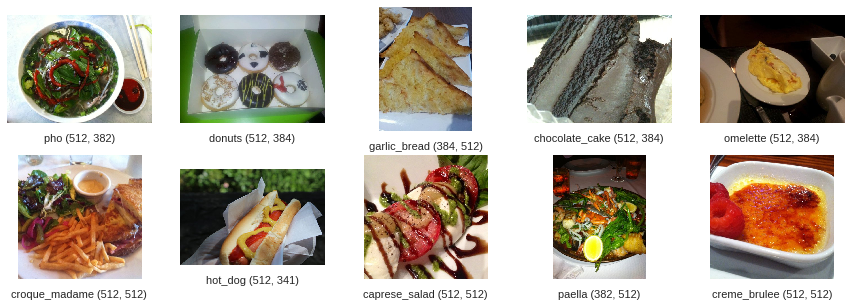

In [0]:
show_img(2, 5, (15, 5))

In [0]:
batch_size = 64

datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             preprocessing_function=preprocess_input,
                             validation_split=0.2,
                             horizontal_flip=True)


train_generator = datagen.flow_from_directory(path,
                                              target_size=(299, 299),
                                              batch_size=batch_size,
                                              subset='training',
                                              class_mode='categorical')

val_generator = datagen.flow_from_directory(path,
                                            target_size=(299, 299),
                                            batch_size=batch_size,
                                            subset='validation',
                                            class_mode='categorical')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [0]:
def build_model(name):
    if name == 'vgg19':
        base_model = VGG19(weights='imagenet', include_top=False, pooling='avg')
        for layer in base_model.layers:
            layer.trainable = False
        x = base_model.output
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        predictions = Dense(num_classes, activation='softmax')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)

    elif name == 'Inceptionv3':
        base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
        for layer in base_model.layers:
            layer.trainable = False
        x = base_model.output
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        predictions = Dense(num_classes, activation='softmax')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)     
        
    elif name == 'densenet201':
        base_model = DenseNet201(weights='imagenet', include_top=False, pooling='avg')
        for layer in base_model.layers:
            layer.trainable = False
        x = base_model.output
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1024, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.75)(x)
        predictions = Dense(num_classes, activation='softmax')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)
        
    elif name == 'xception':
        base_model = Xception(weights='imagenet', include_top=False, pooling='avg')
        for layer in base_model.layers:
            layer.trainable = False
        x = base_model.output
        
        x = Dense(256, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        predictions = Dense(num_classes, activation='softmax')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)        
        
    elif name == 'resnet50':
        base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        for layer in base_model.layers:
            layer.trainable = False
        x = base_model.output
        
        x = Dense(1024, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.75)(x)
        predictions = Dense(num_classes, activation='softmax')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)
        
#     elif name == 'custom':
        
        
    return model

In [0]:
name = 'xception'

In [0]:
model = build_model(name)

Instructions for updating:
Colocations handled automatically by placer.
83689472/83683744 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [0]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d_1 False
13 block2_pool False
14 batch_normalization_1 False
15 add_1 False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_2 False
23 block3_pool False
24 batch_normalization_2 False
25 add_2 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_3 False
33 block4_pool False
34 batch_normalization_3 False
35 add_3 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2

In [0]:
AdamW = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=True)
#opt = SGD(lr=.001, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=AdamW, metrics=['acc', 'top_k_categorical_accuracy'])

import keras.backend as K
import math
from tqdm import tqdm

def find_lr(model, init_value = 1e-8, final_value=10., beta = 0.98):
    
    num = len(train_generator)-1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    K.set_value(model.optimizer.lr, lr)
    
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    
    for i in tqdm(range(train_generator.samples // batch_size)):
        batch_num += 1

        data = next(train_generator)
        
        #print ("\n", batch_num, lr, "\n")
    
        history = model.train_on_batch(data[0], data[1])
#         loss = history.history['loss'][0]       
#         print ('Loss:', history[0])
#         print ('Acc:', history[1])
#         print ('Top-5 Acc:', history[2])
        
        loss = history[0]
        #Compute the smoothed loss
        avg_loss = beta * avg_loss + (1-beta) * loss
        smoothed_loss = avg_loss / (1 - beta ** batch_num)
        
        #Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        
        #Record the best loss
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
        #Store the values
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))

        #Update the lr for the next step
        lr *= mult
        K.set_value(model.optimizer.lr, lr)

        
    return log_lrs, losses

  0%|          | 0/1262 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


 88%|████████▊ | 1105/1262 [53:48<07:36,  2.91s/it]

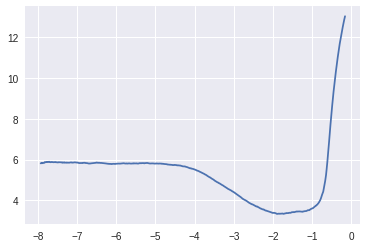

In [0]:
logs,losses = find_lr(model)

plt.plot(logs[10:-5],losses[10:-5])
plt.show()

In [0]:
import os
import numpy as np
import warnings

from keras.callbacks import Callback
from keras import backend as K


# Code is ported from https://github.com/fastai/fastai
class OneCycleLR(Callback):

    def __init__(self, num_samples, num_epochs, batch_size, max_lr,
                 end_percentage=0.1, scale_percentage=None,
                 maximum_momentum=0.95, minimum_momentum=0.85,
                 verbose=False):
        """ This callback implements a cyclical learning rate policy (CLR).
        This is a special case of Cyclic Learning Rates, where we have only 1 cycle.
        After the completion of 1 cycle, the learning rate will decrease rapidly to
        100th its initial lowest value.
        # Arguments:
            num_samples: Integer. Number of sample points in the dataset
            num_epochs: Integer. Number of training epochs
            batch_size: Integer. Batch size per training epoch
            max_lr: Float. Initial learning rate. This also sets the
                starting learning rate (which will be 10x smaller than
                this), and will increase to this value during the first cycle.
            end_percentage: Float. The percentage of all the epochs of training
                that will be dedicated to sharply decreasing the learning
                rate after the completion of 1 cycle. Must be between 0 and 1.
            scale_percentage: Float or None. If float, must be between 0 and 1.
                If None, it will compute the scale_percentage automatically
                based on the `end_percentage`.
            maximum_momentum: Optional. Sets the maximum momentum (initial)
                value, which gradually drops to its lowest value in half-cycle,
                then gradually increases again to stay constant at this max value.
                Can only be used with SGD Optimizer.
            minimum_momentum: Optional. Sets the minimum momentum at the end of
                the half-cycle. Can only be used with SGD Optimizer.
            verbose: Bool. Whether to print the current learning rate after every
                epoch.
        # Reference
            - [A disciplined approach to neural network hyper-parameters: Part 1 -- learning rate, batch size, weight_decay, and weight decay](https://arxiv.org/abs/1803.09820)
            - [Super-Convergence: Very Fast Training of Residual Networks Using Large Learning Rates](https://arxiv.org/abs/1708.07120)
        """
        super(OneCycleLR, self).__init__()

        if end_percentage < 0. or end_percentage > 1.:
            raise ValueError("`end_percentage` must be between 0 and 1")

        if scale_percentage is not None and (scale_percentage < 0. or scale_percentage > 1.):
            raise ValueError("`scale_percentage` must be between 0 and 1")

        self.num_samples = num_samples
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.num_samples_per_batch = num_samples // batch_size
        self.initial_lr = max_lr
        self.end_percentage = end_percentage
        self.scale = float(scale_percentage) if scale_percentage is not None else float(end_percentage)
        self.max_momentum = maximum_momentum
        self.min_momentum = minimum_momentum
        self.verbose = verbose

        self.num_iterations = self.num_epochs * self.num_samples_per_batch
        self.mid_cycle_id = int(self.num_iterations * ((1. - end_percentage)) / float(2))

        if self.max_momentum is not None and self.min_momentum is not None:
            self._update_momentum = True
        else:
            self._update_momentum = False

        self.clr_iterations = 0.
        self.history = {}

    def _reset(self):
        """
        Reset the callback.
        """
        self.clr_iterations = 0.
        self.history = {}

    def compute_lr(self):
        """
        Compute the learning rate based on which phase of the cycle it is in.
        - If in the first half of training, the learning rate gradually increases.
        - If in the second half of training, the learning rate gradually decreases.
        - If in the final `end_percentage` portion of training, the learning rate
            is quickly reduced to near 100th of the original min learning rate.
        # Returns:
            the new learning rate
        """
        if self.clr_iterations > 2 * self.mid_cycle_id:
            current_percentage = (self.clr_iterations - 2 * self.mid_cycle_id)
            current_percentage /= float((self.num_iterations - 2 * self.mid_cycle_id))
            new_lr = self.initial_lr * (1. + (current_percentage * (1. - 100.) / 100.)) * self.scale

        elif self.clr_iterations > self.mid_cycle_id:
            current_percentage = 1. - (self.clr_iterations - self.mid_cycle_id) / self.mid_cycle_id
            new_lr = self.initial_lr * (1. + current_percentage * (self.scale * 100 - 1.)) * self.scale

        else:
            current_percentage = self.clr_iterations / self.mid_cycle_id
            new_lr = self.initial_lr * (1. + current_percentage * (self.scale * 100 - 1.)) * self.scale

        if self.clr_iterations == self.num_iterations:
            self.clr_iterations = 0

        return new_lr

    def compute_momentum(self):
        """
         Compute the momentum based on which phase of the cycle it is in.
        - If in the first half of training, the momentum gradually decreases.
        - If in the second half of training, the momentum gradually increases.
        - If in the final `end_percentage` portion of training, the momentum value
            is kept constant at the maximum initial value.
        # Returns:
            the new momentum value
        """
        if self.clr_iterations > 2 * self.mid_cycle_id:
            new_momentum = self.max_momentum

        elif self.clr_iterations > self.mid_cycle_id:
            current_percentage = 1. - ((self.clr_iterations - self.mid_cycle_id) / float(self.mid_cycle_id))
            new_momentum = self.max_momentum - current_percentage * (self.max_momentum - self.min_momentum)

        else:
            current_percentage = self.clr_iterations / float(self.mid_cycle_id)
            new_momentum = self.max_momentum - current_percentage * (self.max_momentum - self.min_momentum)

        return new_momentum

    def on_train_begin(self, logs={}):
        logs = logs or {}

        self._reset()
        K.set_value(self.model.optimizer.lr, self.compute_lr())

        if self._update_momentum:
            if not hasattr(self.model.optimizer, 'beta_1'):
                raise ValueError("Momentum can be updated only on SGD optimizer !")

            new_momentum = self.compute_momentum()
            K.set_value(self.model.optimizer.beta_1, new_momentum)

    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}

        self.clr_iterations += 1
        new_lr = self.compute_lr()

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        K.set_value(self.model.optimizer.lr, new_lr)

        if self._update_momentum:
            if not hasattr(self.model.optimizer, 'beta_1'):
                raise ValueError("Momentum can be updated only on SGD optimizer !")

            new_momentum = self.compute_momentum()

            self.history.setdefault('beta_1', []).append(K.get_value(self.model.optimizer.beta_1))
            K.set_value(self.model.optimizer.beta_1, new_momentum)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

    def on_epoch_end(self, epoch, logs=None):
        if self.verbose:
            if self._update_momentum:
                print(" - lr: %0.5f - momentum: %0.2f " % (self.history['lr'][-1],
                                                           self.history['beta_1'][-1]))

            else:
                print(" - lr: %0.5f " % (self.history['lr'][-1]))


In [0]:
model = build_model(name)

In [0]:
AdamW = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=True)
sgd = SGD(lr=.001, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=AdamW, metrics=['acc', 'top_k_categorical_accuracy'])


mc = ModelCheckpoint(filepath='weights.{epoch:02d}-{val_acc:.2f}.hdf5', 
                     monitor='val_acc', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='val_acc', patience=3, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=1, min_lr=0.0001, verbose=1)

# clr = CyclicLR(base_lr=1e-3, max_lr=1e-2, step_size=2500., mode='triangular2')


# lr_manager = OneCycleLR(num_samples=train_generator.samples, 
#                         num_epochs=15,  
#                         batch_size=batch_size, 
#                         max_lr=0.001,
#                         end_percentage=0.1,
#                         maximum_momentum=0.95, 
#                         minimum_momentum=0.85,
#                         verbose=False)

# clr = CyclicLR(base_lr=0.001, max_lr=0.007, 
#                step_size=2500., mode='exp_range', gamma=0.99994)

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples // batch_size,
                              epochs=15,
                              validation_data=val_generator,
                              validation_steps=val_generator.samples // batch_size,
                              callbacks=[mc, es])

Epoch 1/15
1262/1262 [==============================] - 3341s 3s/step - loss: 2.8344 - acc: 0.3160 - top_k_categorical_accuracy: 0.5985 - val_loss: 2.6941 - val_acc: 0.3402 - val_top_k_categorical_accuracy: 0.6325

Epoch 00001: val_acc improved from -inf to 0.34018, saving model to weights.01-0.34.hdf5
Epoch 2/15
1262/1262 [==============================] - 3296s 3s/step - loss: 2.5249 - acc: 0.3780 - top_k_categorical_accuracy: 0.6652 - val_loss: 2.7072 - val_acc: 0.3493 - val_top_k_categorical_accuracy: 0.6372

Epoch 00002: val_acc improved from 0.34018 to 0.34932, saving model to weights.02-0.35.hdf5
Epoch 3/15
1262/1262 [==============================] - 3268s 3s/step - loss: 2.4147 - acc: 0.4019 - top_k_categorical_accuracy: 0.6855 - val_loss: 2.7477 - val_acc: 0.3429 - val_top_k_categorical_accuracy: 0.6271

Epoch 00003: val_acc did not improve from 0.34932
Epoch 4/15
1262/1262 [==============================] - 3279s 3s/step - loss: 2.3567 - acc: 0.4169 - top_k_categorical_accur

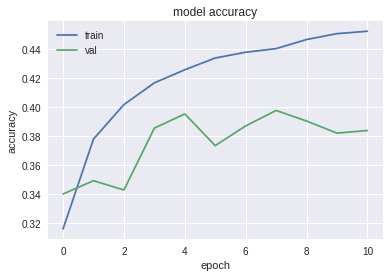

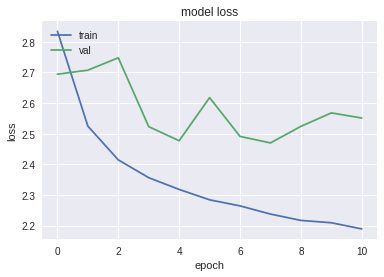

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
file_path = f'{name}_model-224_weights.h5'
model.save_weights(file_path)

In [0]:
# as always take precaution by creating a copy

%time !cp "{name}_model-224_weights.h5" "/content/drive/My Drive/Colab Notebooks/{name}_model-224_weights.h5"

CPU times: user 283 ms, sys: 107 ms, total: 390 ms
Wall time: 15.3 s


In [0]:
# time to pay back
%time !cp "/content/drive/My Drive/Colab Notebooks/xception_model-224_weights.h5" "xception_model-224_weights.h5" 

CPU times: user 68.8 ms, sys: 27.9 ms, total: 96.7 ms
Wall time: 5.45 s


### Finetuning

In [0]:
def finetune_model(model, name):
    
    if name == 'vgg19':
        for layer in model.layers[:12]:
            layer.trainable = False
        for layer in model.layers[12:]:
            layer.trainable = True

    elif name == 'Inceptionv3':
        for layer in model.layers[:299]:
            layer.trainable = False
        for layer in model.layers[299:]:
            layer.trainable = True   
        
    elif name == 'densenet201':
        for layer in model.layers[:700]:
            layer.trainable = False
        for layer in model.layers[700:]:
            layer.trainable = True
        
    elif name == 'xception':
        for layer in model.layers[:122]:
            layer.trainable = False
        for layer in model.layers[122:]:
            layer.trainable = True       
        
    elif name == 'resnet50':
        for layer in model.layers[:165]:
            layer.trainable = False
        for layer in model.layers[165:]:
            layer.trainable = True
        
#     elif name == 'custom':
        
        
    return model

In [0]:
file_path = f'{name}_model-224_weights.h5'
model = build_model(name)
model.load_weights(file_path)

In [0]:
model = finetune_model(model, name)

In [0]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d_5 False
13 block2_pool False
14 batch_normalization_6 False
15 add_13 False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_6 False
23 block3_pool False
24 batch_normalization_7 False
25 add_14 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_7 False
33 block4_pool False
34 batch_normalization_8 False
35 add_15 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepco

  0%|          | 0/1262 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


 81%|████████  | 1017/1262 [51:21<12:12,  2.99s/it]

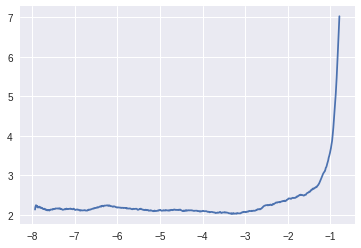

In [0]:
AdamW = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=True)
#opt = SGD(lr=.01, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=AdamW, metrics=['acc', 'top_k_categorical_accuracy'])

logs,losses = find_lr(model)

plt.plot(logs[10:-5],losses[10:-5])
plt.show()

In [0]:
model = finetune_model(model, name)

model.load_weights(file_path)

In [0]:
AdamW = Adam(lr=0.001, amsgrad=True)
model.compile(loss='categorical_crossentropy', optimizer=AdamW, metrics=['acc', 'top_k_categorical_accuracy'])

In [25]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples // batch_size,
                              epochs=15,
                              validation_data=val_generator,
                              validation_steps=val_generator.samples // batch_size,
                              callbacks=[mc, es])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1262/1262 [==============================] - 3646s 3s/step - loss: 1.8694 - acc: 0.5264 - top_k_categorical_accuracy: 0.7862 - val_loss: 2.2708 - val_acc: 0.4702 - val_top_k_categorical_accuracy: 0.7363

Epoch 00001: val_acc improved from -inf to 0.47024, saving model to weights.01-0.47.hdf5
Epoch 2/15
1262/1262 [==============================] - 3613s 3s/step - loss: 1.4271 - acc: 0.6315 - top_k_categorical_accuracy: 0.8596 - val_loss: 2.3483 - val_acc: 0.4679 - val_top_k_categorical_accuracy: 0.7332

Epoch 00002: val_acc did not improve from 0.47024
Epoch 3/15
1262/1262 [==============================] - 3544s 3s/step - loss: 1.2124 - acc: 0.6823 - top_k_categorical_accuracy: 0.8898 - val_loss: 2.0672 - val_acc: 0.5142 - val_top_k_categorical_accuracy: 0.7676

Epoch 00003: val_acc improved from 0.47024 to 0.51415, saving model to weights.03-0.51.hdf5
Epoch 4/15
1262/1262 [==============================] - 3480s 3s/step - loss

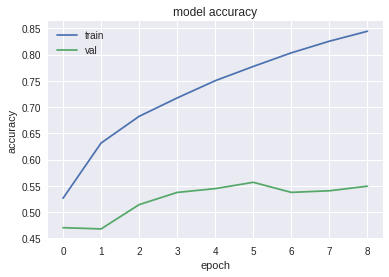

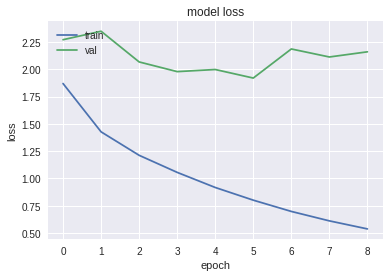

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
file_path = f'{name}_finetune_model-224_weights.h5'
model.save_weights(file_path)

In [28]:
# as always take precaution by creating a copy

%time !cp "{name}_finetune_model-224_weights.h5" "/content/drive/My Drive/Colab Notebooks/{name}_finetune_model-224_weights.h5"

CPU times: user 436 ms, sys: 120 ms, total: 556 ms
Wall time: 15.4 s


## Inference

In [0]:
from keras.preprocessing.image import array_to_img 

In [86]:
img, lbl = val_generator.next()

y_proba = model.predict_on_batch(img)
y_classes = y_proba.argmax(axis=-1)
print (y_proba.shape, lbl.shape, y_classes.shape)

(64, 101) (64, 101) (64,)


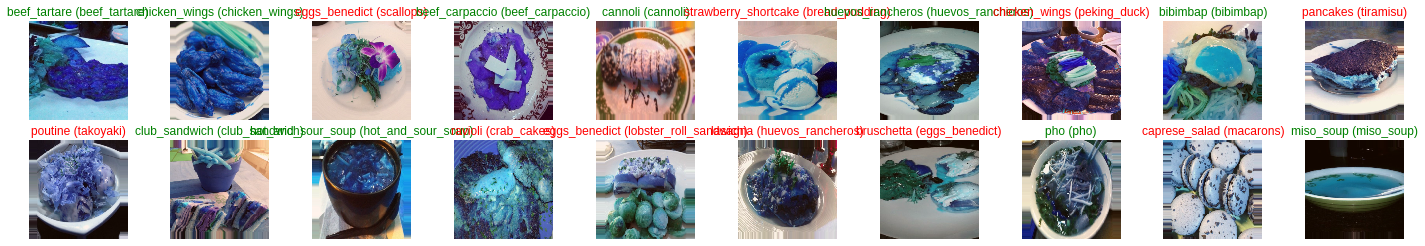

In [87]:
# obtain one batch of test images
images, predict = img, lbl
true_classes = np.argmax(lbl, axis=1)
pred_classes = y_classes
label_map = train_generator.class_indices
# convert output probabilities to predicted class

true_lbl = [dict((v,k) for k,v in label_map.items()).get(true_classes[i]) for i in range(len(true_classes))]
pred_lbl = [dict((v,k) for k,v in label_map.items()).get(pred_classes[i]) for i in range(len(pred_classes))]

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(array_to_img(images[idx]))
    ax.set_title("{} ({})".format(str(pred_lbl[idx]), str(true_lbl[idx])),
                 color=("green" if true_lbl[idx]==pred_lbl[idx] else "red"))

In [88]:
print ('Accuracy : {}%'.format((true_classes == pred_classes).sum()))

Accuracy : 38%
